In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline



C:\Users\nasse\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("train.csv")

# A-1 Classifieurs Traditionnels

# Observation des données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### EXEMPLE

In [6]:
i=15
df.text.iloc[i],df.target.iloc[i]

("What's up man?", 0)

### Proportion des  0 et 1 sachant que: 
#### 0:TWEET NORMAL
#### 1:TWEET URGENT

In [7]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
df.target.value_counts(normalize=True) 

0    0.57034
1    0.42966
Name: target, dtype: float64

 les données semble bien équilibré, on a presque autant de 0 que des 1

### feature engeneering


#### text_length

In [9]:
df["text_length"]=df["text"].apply(lambda x: len(x.replace(" ", "")))

In [10]:
df[45:50]

,id,keyword,location,text,target,text_length
45,65,ablaze,NaN,I gained 3 followers in the last week. You? Kn...,0,81
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1,85
47,67,ablaze,NaN,Building the perfect tracklist to life leave t...,0,54
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,107
49,71,ablaze,England.,First night with retainers in. It's quite weir...,0,112


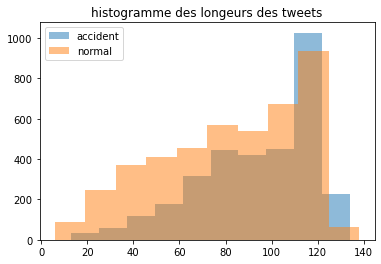

In [10]:
plt.hist(df[df["target"]==1]["text_length"], alpha=0.5, label="accident")
plt.hist(df[df["target"]==0]["text_length"], alpha=0.5, label="normal")
plt.legend(loc="upper left")
plt.title("histogramme des longeurs des tweets")
plt.show()
 

On voit bien que les tweets accident ont tendance à être long par rapport aux tweet normaux,
toute fois,à vue d'oeil; la difference n'est pas si important, pour pouvoir influencer la prédiction du modèle 
donc on ne va pas tenir compte de ce featuring ingeneering, dans notre modèle

#### the keyword

<AxesSubplot:xlabel='count', ylabel='keyword'>

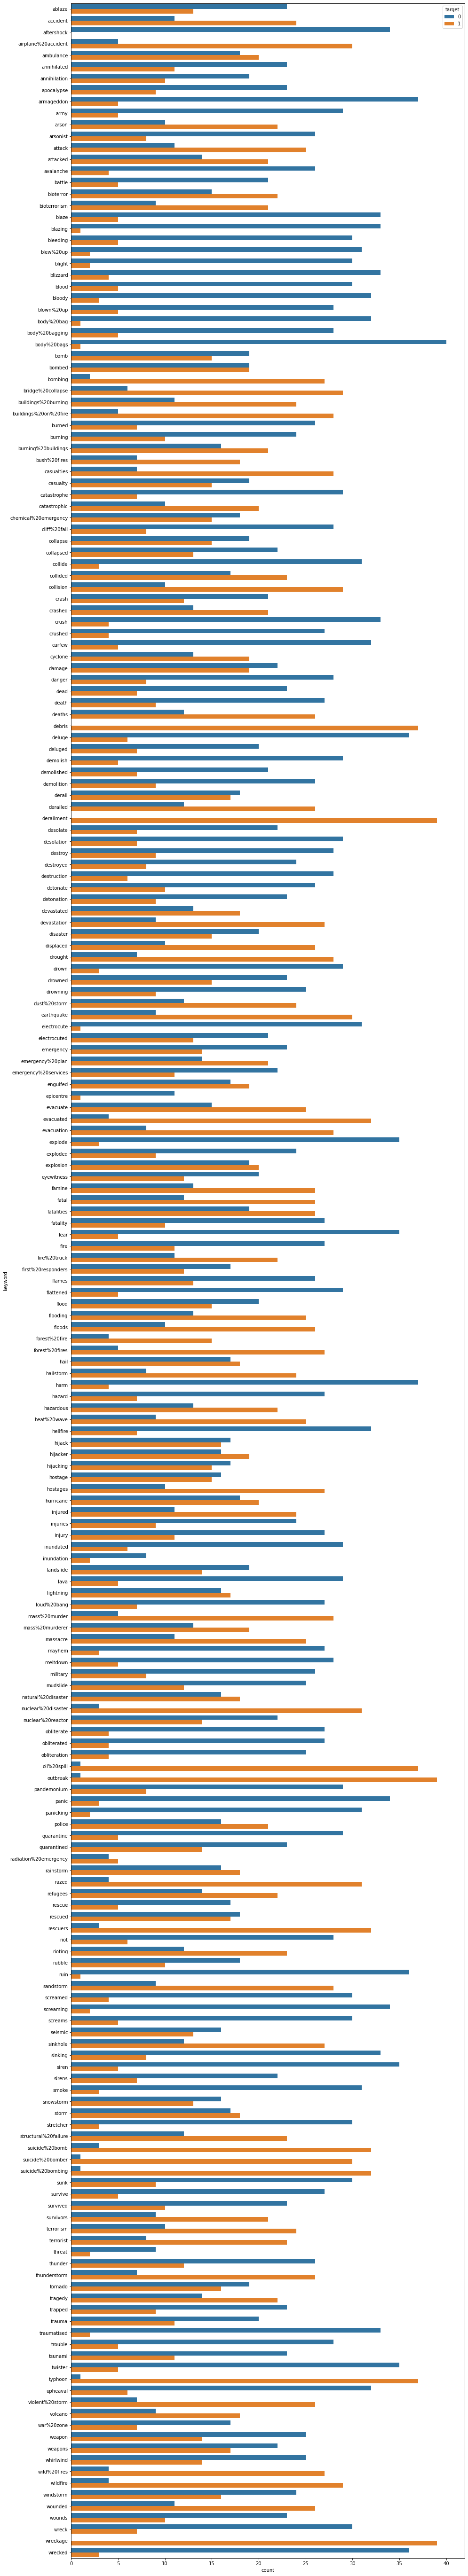

In [11]:
plt.figure(figsize=(15,100))
sns.countplot(data=df,y="keyword",hue="target")

il y a des keywords qui ont tendance a désigner des tweets désastreux et d autres pour des tweet normaux, mais comme précedement on ne va pas les prendre en compte dans notre modèle pour qu il soit moins long  

# partition des données

In [12]:
const=200
X_train,X_test,Y_train,Y_test=train_test_split(
    df["text"],
    df["target"],
    test_size=0.15,
    random_state=const)

on a choisi une constante const, fixé pour que durant nos manipulations, notre X_train,X_test,Y_train et Y_test restent constante

In [13]:
X_train.shape

(6471,)

In [14]:
X_train.head()

125     Sometimes you face difficulties not because yo...
4336    Patience Jonathan On The Move To Hijack APC In...
6323    @DareToTaha nah but thinking of getting a stre...
3960    Cuban leader extends sympathy to Vietnam over ...
7238      #Battlefield 1942 forgotten hope secret weapons
Name: text, dtype: object

In [15]:
Y_train.shape


(6471,)

In [16]:
Y_train.head()

125     0
4336    0
6323    0
3960    1
7238    1
Name: target, dtype: int64

# Preprocessing

Notre Preprocessing,vas principalement être l'utilisation de CountVectorizer, afin de pouvoir tirer des textes, une matrice, manipulable par les algorithme de classification  

In [17]:
Vectorizer=CountVectorizer()
X_train_vec_pre=Vectorizer.fit_transform(X_train)
X_test_vec_pre=Vectorizer.transform(X_test)

In [18]:
Vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ûó', 'ûókody', 'ûówe'], dtype=object)

Vectorizer.get_feature_names_out(), donne les mots(tokens), utiliser par Counvectorizer pour creer la matrice a utiliser

In [19]:
type(X_train_vec_pre)

scipy.sparse.csr.csr_matrix

### 1er modèle, modèle sans le feature ingenering

#### RandomForestClassifier

In [20]:
rfc=RandomForestClassifier(random_state=const)
rfc_fit=rfc.fit(X_train_vec_pre,Y_train)

In [21]:
rfc_fit.score(X_test_vec_pre,Y_test)

0.7968476357267951

In [22]:
print(classification_report(Y_test, rfc_fit.predict(X_test_vec_pre)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       668
           1       0.88      0.59      0.71       474

    accuracy                           0.80      1142
   macro avg       0.82      0.77      0.78      1142
weighted avg       0.81      0.80      0.79      1142



In [23]:
resultat=cross_val_score(rfc, X_train_vec_pre,Y_train, cv=3)
resultat

array([0.77839592, 0.77561428, 0.78535002])

en moyenne, on a un taux de réussite de 78% environ

-exemple d'une inference

In [24]:
rfc_fit.predict(Vectorizer.transform(["emergency, a personne have been killed last night "]))

array([0], dtype=int64)

On voit que malgré que le message soit urgent, l algorithme n'a pas jugé necessaire de classé le message, comme accident(urgence)

### deuxieme exemple, modele sans le feature ingenering

 
#### MultinomialNB


In [25]:
nb = MultinomialNB()
nb_fit=nb.fit(X_train_vec_pre,Y_train)

In [26]:
nb_fit.score(X_test_vec_pre,Y_test)

0.8099824868651488

In [27]:
print(classification_report(Y_test, nb.predict(X_test_vec_pre)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       668
           1       0.82      0.70      0.75       474

    accuracy                           0.81      1142
   macro avg       0.81      0.79      0.80      1142
weighted avg       0.81      0.81      0.81      1142



In [28]:
resultat2=cross_val_score(nb, X_train_vec_pre,Y_train, cv=3)
resultat2

array([0.78535002, 0.78488642, 0.80296708])

en moyenne, on a un taux de réussite de 79% environ

-exemple d'une inference

In [29]:
nb.predict(Vectorizer.transform(["emergency, a personne have been killed last night "]))

array([1], dtype=int64)

il semble bien que ce deuxième algorithme marche bien que le premier, autant dans les validation, que les inferences, toute fois il est important de faire attention à cette conclusion car les difference ne sont pas très important, et il y a aussi le risque de sur-apprentissage

### troisième exemple, modele sans le feature ingenering

In [30]:
svm_=svm.SVC(kernel="linear",probability=True)
svm_fit=svm_.fit(X_train_vec_pre,Y_train)

In [31]:
svm_fit.score(X_test_vec_pre,Y_test)

0.8056042031523643

In [32]:
print(classification_report(Y_test, svm_fit.predict(X_test_vec_pre)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       668
           1       0.78      0.73      0.76       474

    accuracy                           0.81      1142
   macro avg       0.80      0.80      0.80      1142
weighted avg       0.80      0.81      0.80      1142



In [33]:
resultat3=cross_val_score(svm_fit, X_train_vec_pre,Y_train, cv=3)
resultat3

array([0.77607789, 0.75892443, 0.77144182])

# Pipeline


dans cette partie on va construire 3 pipeline correspondant à nos deux modèle précedent

### 1er pipeline  


In [34]:
ppln_RFC =make_pipeline(
    CountVectorizer(),
    RandomForestClassifier(random_state=const)
)
print(ppln_RFC)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=200))])


In [35]:
ppln_RFC_fit=ppln_RFC.fit(X_train,Y_train)

In [36]:
ppln_RFC_fit.score(X_test,Y_test)

0.7968476357267951

In [37]:
ppln_RFC_fit.predict(["One person was killed last night"])

array([0], dtype=int64)

on remmarque, qu'il faut faire attention à la prédiction de nos modèle,le modèle c est trompé

### 2eme pipeline

In [38]:
ppln_MNB =make_pipeline(
    CountVectorizer(),
    MultinomialNB()
)

In [39]:
ppln_MNB_fit=ppln_MNB.fit(X_train,Y_train)

In [40]:
ppln_MNB_fit.score(X_test,Y_test)

0.8099824868651488

In [41]:
ppln_MNB_fit.predict(["one person was killed last night"])

array([1], dtype=int64)

### 3eme pipeline

In [42]:
ppln_svm= make_pipeline(
    CountVectorizer(),
    svm.SVC(kernel='linear',probability=True)  
)
ppln_svm_fit=ppln_svm.fit(X_train,Y_train)

In [43]:
ppln_svm_fit.score(X_test,Y_test)

0.8056042031523643

In [44]:
ppln_svm_fit.predict(["one person was killed last night"])

array([0], dtype=int64)

# prédiction

In [45]:
Data_test=pd.read_csv("test.csv")

In [46]:
PREDICTION_RFC=ppln_RFC_fit.predict(Data_test["text"])
PREDICTION_MNB=ppln_MNB_fit.predict(Data_test["text"])
PREDICTION_svm=ppln_svm_fit.predict(Data_test["text"])

In [47]:
sample=pd.read_csv("sample_submission.csv")


### courbe representatives

#### histogramme

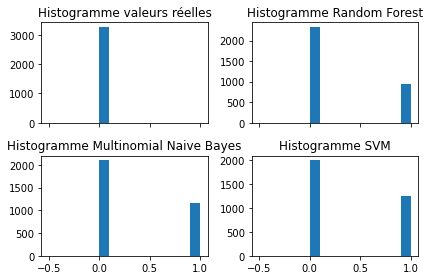

In [48]:
fig, axs = plt.subplots(2, 2, sharex=True)
# Sous-graphique 1
axs[0, 0].hist(sample["target"], label="les valeurs reels")
axs[0, 0].set_title("Histogramme valeurs réelles")

# Sous-graphique 2
axs[0, 1].hist(PREDICTION_RFC, label="prediction avec Randomforest")
axs[0, 1].set_title("Histogramme Random Forest")

# Sous-graphique 3
axs[1, 0].hist(PREDICTION_MNB, label="prediction avec MultinomialNB")
axs[1, 0].set_title("Histogramme Multinomial Naive Bayes")

# Sous-graphique 4
axs[1, 1].hist(PREDICTION_svm, label="prediction avec svm")
axs[1, 1].set_title("Histogramme SVM")

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

#### Graphique en camembert

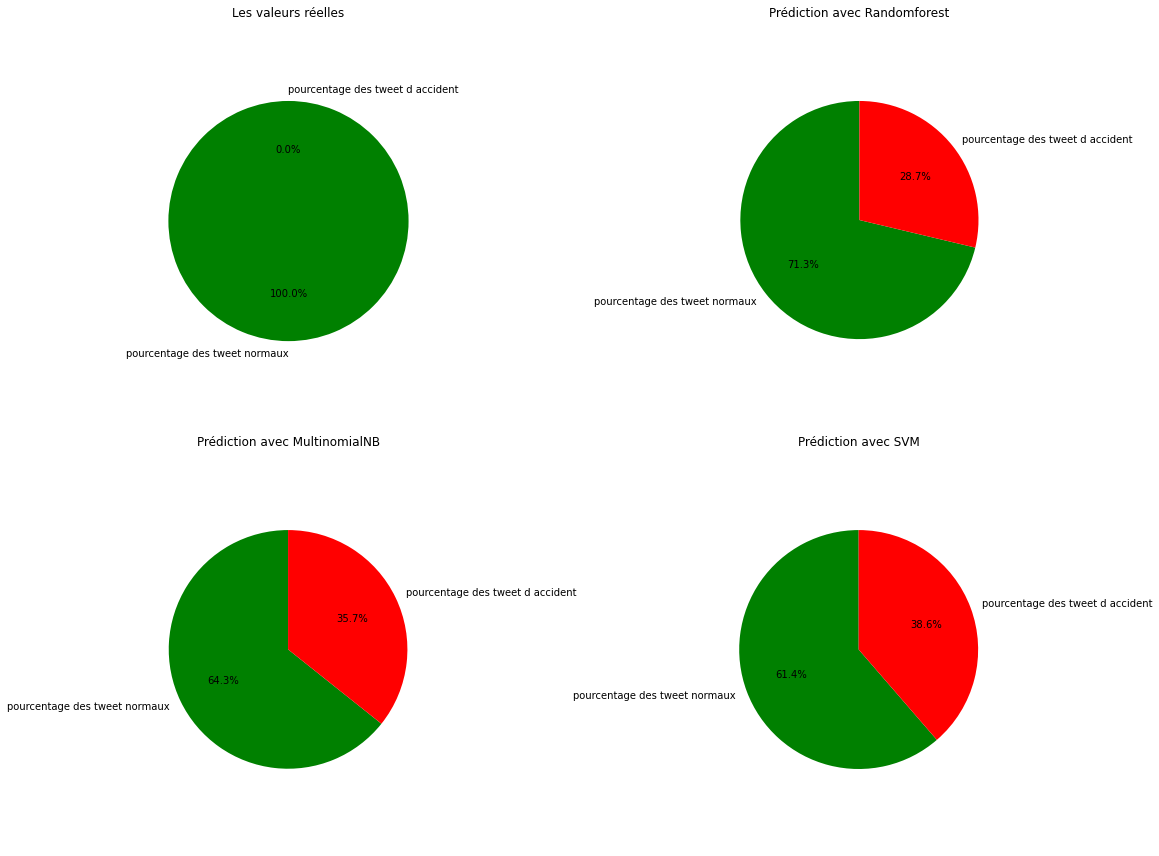

In [49]:
def function0(liste):
    point0=0
    point1=0
    for i in liste:
        if i==0:
            point0=point0+1
        else:
            point1=point1+1
    return point0, point1


total= len(sample)


def function11(data,titre):
    # Données d'exemple
    
    categories = ['pourcentage des tweet normaux', 'pourcentage des tweet d accident']
    pourcentages = [ 100*function0(data)[0]/total, 100*function0(data)[1]/total ]
    couleurs = ['green', 'red']  # Couleurs des secteurs

    # Création du graphique en secteurs
    fig, ax = plt.subplots()
    ax.pie(pourcentages, labels=categories, colors=couleurs, autopct='%1.1f%%', startangle=90)

    # Ajout d'un titre
    ax.set_title(titre)
    
    # Affichage du graphique
    plt.axis('equal')  # Pour un aspect circulaire
    plt.show()


def create_pie_chart(data, titre, ax):
    categories = ['pourcentage des tweet normaux', 'pourcentage des tweet d accident']
    pourcentages = [100 * function0(data)[0] / total, 100 * function0(data)[1] / total]
    couleurs = ['green', 'red']

    ax.pie(pourcentages, labels=categories, colors=couleurs, autopct='%1.1f%%', startangle=90)
    ax.set_title(titre)
    ax.axis('equal')

# Création de la figure et des sous-graphiques (2 lignes, 2 colonnes)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Premier sous-graphique
create_pie_chart(sample["target"], "Les valeurs réelles", axs[0, 0])

# Deuxième sous-graphique
create_pie_chart(PREDICTION_RFC, "Prédiction avec Randomforest", axs[0, 1])

# Troisième sous-graphique
create_pie_chart(PREDICTION_MNB, "Prédiction avec MultinomialNB", axs[1, 0])

# Quatrième sous-graphique
create_pie_chart(PREDICTION_svm, "Prédiction avec SVM", axs[1, 1])

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()



on voit bien que c est l algorithme random forrest qui est le plus efficace, malgré des test-validation plutôt défavorable par rapport aux autres